In this excercise, we will use ollama to prompt an LLM using an image and text. <br>
Image used here is from, https://iopscience.iop.org/article/10.1088/1757-899X/941/1/012017

In [2]:
import ollama
from PIL import Image

In [ ]:
!pip install ollama

Display the image

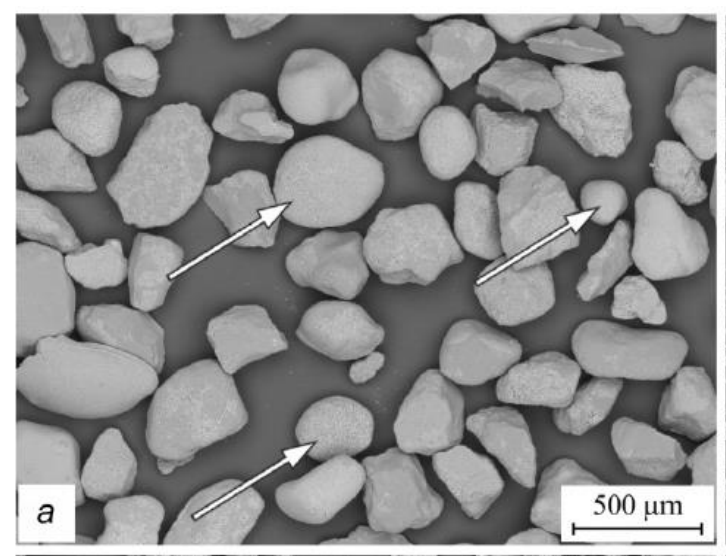

In [4]:
Image.open('images/sandy_a.png')

#### Choose a vision-capable model installed in Ollama (e.g., "llava", "llava-llama3", "llama3-vision", "moondream")

In [11]:
model_name = 'moondream:latest'

#### Run the chat

In [ ]:
response = ollama.chat(
    model=model_name,
    messages=[
        {
            "role": "user",
            "content": "Describe this image.",
            'images': ["images/sandy_a.png"] # path of the image
        },
    ],
)
print(response.message.content)


The image presents a close-up view of a rock sample, captured in black and white. The rock is composed of numerous small rocks, each with its own unique shape and size. These rocks are scattered across the surface of the rock, creating an intricate pattern that showcases the natural diversity within the sample.

In addition to the rocks themselves, there are several arrows pointing towards different parts of the image. These arrows serve as a guide for the viewer's eyes, directing them through the various elements present in the photograph. The precise locations and orientations of these arrows provide context about the rock sample's composition and structure.


##### Use different images. Ask different questions.

#### Without providing the image path, you can also provide the encoded image.

In [11]:
import io
import base64

This function,
- Opens an image file from the specified path.
- Converts the image to PNG format and saves it into an in-memory bytes buffer (io.BytesIO()).
- Encodes the image data in base64, turning the binary image data into a text string.
- Returns the base64-encoded string representation of the image.

This is useful for transmitting image data as text, such as embedding images in JSON or HTML, or sending images over protocols that only support text

In [12]:
def encode_image(image_path):
    image = Image.open(image_path)
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    image_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return image_base64

Encode the image

In [13]:
base64_image = encode_image('images/sandy_a.png')

Run the chat

In [ ]:
response = ollama.chat(
    model=model_name,
    messages=[
        {
            "role": "user",
            "content": "Describe this image.",
            'images': [base64_image]
        },
    ],
)
print(response.message.content)

Here's a description of the image:

**Overall Impression:**

The image is a scanning electron microscope (SEM) micrograph showing a collection of irregularly shaped, granular particles. 

**Details:**

*   **Shape:** The particles are predominantly rounded or oval, with a somewhat irregular surface texture. They aren't perfectly spherical.
*   **Size:** The particles vary in size, ranging from approximately 100 to 300 micrometers (µm) in diameter.
*   **Surface Texture:** The surfaces appear rough and uneven, with numerous small pits and protrusions. This suggests a heterogeneous surface composition or a rough, porous structure.
*   **Color:** The particles appear to be a light gray or beige color.
*   **Scale Bar:** A scale bar of 500 µm is provided, indicating the size of the particles.

**Possible Material:**

Based on the appearance, these particles could be a composite material, such as a ceramic, a mineral aggregate, or a granular material used in a coating or additive. 

**Impor